# Programación para la Bioinformática

Unidad 5: ADN, ARN, secuencias y motivos (Parte 2)
--------------------------------------------------

### Instrucciones de uso
A continuación se presentará la teoría y algún ejemplo de algoritmo genético. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Algoritmos inspirados en la naturaleza
Existe una categoría de algoritmos que utilizan conceptos basados o inspirados en la naturaleza estableciendo una metáfora que los hace más comprensibles para los humanos. Muy populares en algoritmos de inteligencia artificial, empezaron a aparecer en la década de los 70 del siglo pasado y en la última década han explotado hasta convertirse en métodos casi estándares.

Una familia de algoritmos de inteligencia artificial inspirados en la naturaleza muy populares son los **algoritmos genéticos**. Los algoritmos genéticos utilizan conceptos de la genética, como son las mutaciones, los mecanismos de selección o los cruces. Los algoritmos genéticos se utilizan con el objetivo de optimizar valores de una función cualquiera en su espacio de valores. El funcionamiento básico del algoritmo está descrito en la siguiente figura (fuente Wikipedia - https://es.wikipedia.org/wiki/Algoritmo_gen%C3%A9tico):

<img src="files/media/alg_genetico.png">

* **Inicialización** (I). Se genera aleatoriamente una población inicial, constituida por un conjunto de cromosomas (o también llamados genes) que representan posibles soluciones del problema. Esta población deberá tener una diversidad inicial lo suficientemente rica para garantizar que el algoritmo no converja de forma prematura en soluciones no óptimas.
* **Evaluación** (?). Para cada uno de los cromosomas, lo evaluaremos en el espacio de búsqueda (aplicaremos la función que deseamos optimizar) y después calcularemos la distancia a la solución que queremos obtener. Esta solución objetivo es muy importante y está codificada en la función de *fitness* que dirigirá la evolución hacia esa solución óptima (podemos conocerla o no, en este segundo caso, la expresaremos en forma de función: cuán rápido es un coche, cuál es la cantidad monetaria más grande, etc.). Deberemos, además, definir las condiciones de parada del algoritmo para no entrar en bucle infinito: o bien acotando el número de pasos del algoritmo o bien cuando en la población ya no haya cambios. 
* **Selección** (Se). Si no se ha dado la condición de parada, se procede a elegir los cromosomas que serán cruzados en la siguiente generación, para ello, seleccionaremos los mejores cromosomas ordenándolos por su aptitud.
* **Cruce** (Cr). Representa en esta metáfora la reproducción sexual y opera sobre dos cromosomas a la vez para generar dos descendientes donde se combinan las características de ambos cromosomas padres.
* **Mutación** (Mu). Modifica de forma aleatoria parte del cromosoma de los individuos de la población para añadir diversidad y poder salir de pozos locales en el espacio de búsqueda.
* **Reemplazo** (Re). Una vez aplicados los operadores genéticos, se seleccionan los mejores individuos para conformar la población de la generación siguiente y continuar con otro paso de la simulación.

### Ejercicio 1
El siguiente código es una implementación de un algoritmo genético que optimiza la búsqueda de un string, es decir, dado un string **objetivo**, intentad encontrar esa cadena empezando desde diversas cadenas con caracteres aleatorios.

Pasos de simulación: 1158

  Fitness         ADN
------------------------
     0          Python
     1          Pytion
     1          Pytion
     1          Pytion
     1          Pytion
     1          Pytion
     1          Pytion
     1          Pythnn
     1          Pytion
     1          Pytion
     1          Pytion
     2          Qytion
     2          Qytion
     2          Pyuion
     2          Pytioo
     2          Qytion
     2          Pxtion
     2          Pysion
     2          Pztion
     2          Pyuhpn
     2          Qytion
     2          Pytipn
     2          Pxtion
     2          Pztion
     2          Pyuion
     2          Pytipn
     2          Pytioo
     2          Pyuion
     2          Pyuion
     2          Pztion
     2          Pxtion
     2          Pxtion
     2          Qytion
     2          Qytion
     2          Pyuion
     2          Qytion
     3          Qyuion
     3          Qxthoo
     3          Qxtion
     3          Pyuioo
     3

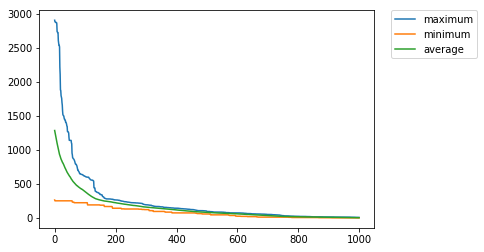

In [11]:

%matplotlib inline
import random
import string
import numpy as np
import matplotlib.pyplot as plt


objetivo = "Python" #Es nuestro objetivo, para que el adn sea igual a esta palabra y no creemos un bucle infinito.


GENES = 20 #los coches que tengo
MAX_GENERACION = 600 #veces que lanzo los coches como maximo
#generacion -> veces que lanzo el coche real


class Individuo(object):   #Se crea la clase individuo con adn y fitness
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness


def calcular_fitness(origen, valor_objetivo): #adn_hijo, objetivo="python"
    fitness = 0
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2 #ord lo que hace es devolver un int (el que corresponde en Unicode)
        #fitness es la distancia a la solucion que queremos obtener. Resta el int que se crea con los valores unicode
        #del valor_objetivo(adn creado) con el int creado a partir del origen(palabra "python"). Esto lo eleva a 2 y va sumando en un rango.
    return fitness


def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:]

    start = random.randint(0, len(padre2.adn) - 1) #Se crea start con un numero aleatorio de 0 hasta la longitud del adn del padre -1
    stop = random.randint(0, len(padre2.adn) - 1) #Se crea stop de la misma manera
    if start > stop: #Si start es mayor a stop, stop pasa a ser start y viceversa
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop] #Iguala adn

    posicion = random.randint(0, len(adn_hijo) - 1)
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    return Individuo(adn_hijo, fitness_hijo)


def padre_al_azar(poblacion):
    #Se crea un padre al azar multiplicando 2 randoms(floats pequeños) * 19
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


def escribe_generacion(generacion, poblacion): #Es el menu, lo que veremos
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    for candidato in poblacion: #De cada uno de los 20 candidatos vere su fitness y su adn
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


def inicializa_poblacion():
    poblacion = []
    variable = 0
    for i in range(0, GENES):
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        #string.printable tiene varios valores, queremos seleccionar del 0 al ultimo-5. 
        #Generamos de la longitud del string objetivo(que es python) diversas combinaciones hasta el numero de genes(20)
        #Asi generamos el ADN
        #Es decir, crearemos 20 combinaciones de 5 caracteres cada una
        fitness = calcular_fitness(adn, objetivo)
        candidate = Individuo(adn, fitness) #Se crea un candidato a partir de la clase Individuo. Se crearan 20 candidate
        poblacion.append(candidate) #Va añadiento candidatos a la poblacion. Se añadiran 20 candidate, de 0 a GENES
    return poblacion


def simulacion():
    poblacion = inicializa_poblacion()
    generacion = 0
    fitness_min_list = []
    fitness_max_list = []
    fitness_avg_list = []
    while generacion < MAX_GENERACION:
        generacion += 1
        
        fitness_list = [individuo.fitness for individuo in poblacion]
        fitness_max_list.append(max(fitness_list))
        fitness_min_list.append(min(fitness_list))
        fitness_avg_list.append(np.average(fitness_list))
        
        poblacion.sort(key=lambda candidate: candidate.fitness) #Te ordena el fitness de los candidatos de la poblacion
        if poblacion[0].fitness == 0: #Si fitness llega a 0 se para
            break
        padre1 = padre_al_azar(poblacion) #Se crea el padre 1 y 2
        padre2 = padre_al_azar(poblacion)
        hijo = mutacion(padre1, padre2)
        if hijo.fitness < poblacion[-1].fitness: #Si el fitness del hijo es mas pequeño que el último, el último pasa a ser hijo
            poblacion[-1] = hijo
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion)
    graphic(fitness_max_list, fitness_min_list, fitness_avg_list)
    
def graphic(fitness_max_list, fitness_min_list, fitness_avg_list):
    plt.subplot(111) #Medida del grafico
    
    plt.plot(fitness_max_list[-100:], label="maximum")
    plt.plot(fitness_min_list[-100:], label="minimum")
    plt.plot(fitness_avg_list[-100:], label="average")
    # Place a legend to the right of this smaller subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    return plt.show()


simulacion()

Es muy importante, tanto en bioinformática como en programación en general, leer e interpretar código de otros programadores. Por ello, en este ejercicio se os pide que comentéis el código anterior con comentarios en el propio código que expliquen las partes más importantes de este.

### Ejercicio 2

Escribe una función de fitness alternativa. Recuerda que fitness=0 indica que la cadena objetivo se ha conseguido. Explica en qué consiste tu función de fitness.

In [2]:
# Respuesta
def calcular_fitness(origen, valor_objetivo): #(adn, objetivo)
    fitness = 0
    for palabra_1, palabra_2 in zip(origen, valor_objetivo):
        if palabra_1 != palabra_2:
            fitness += 1000        
    return fitness

### Ejercicio 3

Representa utilizando matplotlib el máximo fitness, el mínimo y la media por paso de la simulación en un gráfico:

In [1]:
#Respuesta
%matplotlib inline
import random
import string
import numpy as np
import matplotlib.pyplot as plt


objetivo = "Python" #Es nuestro objetivo, para que el adn sea igual a esta palabra y no creemos un bucle infinito.


GENES = 1000 #los coches que tengo
MAX_GENERACION = 1000 #veces que lanzo los coches como maximo
#generacion -> veces que lanzo el coche real


class Individuo(object):   #Se crea la clase individuo con adn y fitness
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness


def calcular_fitness(origen, valor_objetivo): #adn_hijo, objetivo="python"
    fitness = 0
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2 #ord lo que hace es devolver un int (el que corresponde en Unicode)
        #fitness es la distancia a la solucion que queremos obtener. Resta el int que se crea con los valores unicode
        #del valor_objetivo(adn creado) con el int creado a partir del origen(palabra "python"). Esto lo eleva a 2 y va sumando en un rango.
    return fitness


def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:]

    start = random.randint(0, len(padre2.adn) - 1) #Se crea start con un numero aleatorio de 0 hasta la longitud del adn del padre -1
    stop = random.randint(0, len(padre2.adn) - 1) #Se crea stop de la misma manera
    if start > stop: #Si start es mayor a stop, stop pasa a ser start y viceversa
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop] #Iguala adn

    posicion = random.randint(0, len(adn_hijo) - 1)
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    return Individuo(adn_hijo, fitness_hijo)


def padre_al_azar(poblacion):
    #Se crea un padre al azar multiplicando 2 randoms(floats pequeños) * 19
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


def escribe_generacion(generacion, poblacion): #Es el menu, lo que veremos
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    for candidato in poblacion: #De cada uno de los 20 candidatos vere su fitness y su adn
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


def inicializa_poblacion():
    poblacion = []
    variable = 0
    for i in range(0, GENES):
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        #string.printable tiene varios valores, queremos seleccionar del 0 al ultimo-5. 
        #Generamos de la longitud del string objetivo(que es python) diversas combinaciones hasta el numero de genes(20)
        #Asi generamos el ADN
        #Es decir, crearemos 20 combinaciones de 5 caracteres cada una
        fitness = calcular_fitness(adn, objetivo)
        candidate = Individuo(adn, fitness) #Se crea un candidato a partir de la clase Individuo. Se crearan 20 candidate
        poblacion.append(candidate) #Va añadiento candidatos a la poblacion. Se añadiran 20 candidate, de 0 a GENES
    return poblacion


def simulacion():
    poblacion = inicializa_poblacion()
    generacion = 0
    fitness_min_list = []
    fitness_max_list = []
    fitness_avg_list = []
    while generacion < MAX_GENERACION:
        generacion += 1
        
        fitness_list = [individuo.fitness for individuo in poblacion]
        fitness_max_list.append(max(fitness_list))
        fitness_min_list.append(min(fitness_list))
        fitness_avg_list.append(np.average(fitness_list))
        
        poblacion.sort(key=lambda candidate: candidate.fitness) #Te ordena el fitness de los candidatos de la poblacion
        if poblacion[0].fitness == 0: #Si fitness llega a 0 se para
            break
        padre1 = padre_al_azar(poblacion) #Se crea el padre 1 y 2
        padre2 = padre_al_azar(poblacion)
        hijo = mutacion(padre1, padre2)
        if hijo.fitness < poblacion[-1].fitness: #Si el fitness del hijo es mas pequeño que el último, el último pasa a ser hijo
            poblacion[-1] = hijo
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion)
    graphic(fitness_max_list, fitness_min_list, fitness_avg_list)
    
def graphic(fitness_max_list, fitness_min_list, fitness_avg_list):
    plt.subplot(111) #Medida del grafico
    
    plt.plot(fitness_max_list[-100:], label="maximum")
    plt.plot(fitness_min_list[-100:], label="minimum")
    plt.plot(fitness_avg_list[-100:], label="average")
    # Place a legend to the right of this smaller subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    return plt.show()


simulacion()
    

Se ha alcanzado el máximo de generaciones
Pasos de simulación: 1000

  Fitness         ADN
------------------------
   104          Urukkp
   126          Uszkkp
   156          Mrzflu
   201          N}{`mv
   224          Urikkp
   224          Orjllu
   227          Jvikkt
   227          Jvikkt
   227          Usimkp
   238          Oriklu
   241          Nriklu
   252          Jrjklu
   253          Oqiklu
   276          Opmqof
   279          Jvikqx
   288          Kpurow
   289          Krm_fl
   289          Jrimlu
   293          Xpkklu
   296          Jrimku
   302          Jrtkwz
   303          Brwhou
   303          Jrukwz
   312          Xokklu
   315          Bw{ipv
   318          Bqwhou
   321          Jvikds
   321          Jvikds
   323          Jvjkcs
   323          Wwi^ou
   329          Jrzhgz
   332          Cqlcpk
   335          Ori^of
   344          Jvikcs
   348          Ww{iau
   352          Fplcpe
   352          Kplrpw
   356          Ery\pj
   361    

NameError: name 'plt' is not defined